<a href="https://colab.research.google.com/github/Sejal-Jamwal/Liver-Disease-Prediction/blob/main/LIVER_DISEASE_PREDICTION_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #using the dataset to predict wether the person in dignosis has a risk of live failure or not using Ml algorithms
#This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh,
#India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).
#This data set contains 441 male patient records and 142 female patient records.


In [ ]:
#considering the number of female in this dataset is substantially less than the number of men in the datset .
#this model may not be the best guess of predicting the risk of liver diseases


In [ ]:
#now starting with the project we must first read the dataset
#the first step is to read the csv file and for the we need to download and import dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
!pip install jupyter-collaboration

  Obtaining dependency information for jupyter-collaboration from https://files.pythonhosted.org/packages/7b/2f/26348533158f17bf3d319d2d2256ce7a2a23644673d566942bc051fb1a6b/jupyter_collaboration-1.1.0-py3-none-any.whl.metadata
  Using cached jupyter_collaboration-1.1.0-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for jupyter-server<3.0.0,>=2.0.0 from https://files.pythonhosted.org/packages/28/d9/4bf2ab8410cdc37f54aadb6cae497b9bc8ae16720d97b762b9bfb7834022/jupyter_server-2.7.2-py3-none-any.whl.metadata
  Using cached jupyter_server-2.7.2-py3-none-any.whl.metadata (8.6 kB)
  Using cached jupyter_ydoc-1.0.2-py3-none-any.whl (10 kB)
  Obtaining dependency information for ypy-websocket<0.13.0,>=0.12.1 from https://files.pythonhosted.org/packages/e6/84/959514cc1c0110b836602bf8fb68dfe5db0f9b7f4940a26ed564204517c8/ypy_websocket-0.12.1-py3-none-any.whl.metadata
  Using cached ypy_websocket-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached fqdn-1.5.1-py3-none-any.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LAKSHYA RUHELA\\anaconda_3\\Lib\\site-packages\\~mq\\backend\\cython\\context.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
#reading the csv file


In [ ]:
liver_df=pd.read_csv(r"C:\Users\LAKSHYA RUHELA\Downloads\indian_liver_patient.csv")

In [ ]:
#showing the first 5 rows of the dataset


In [ ]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#showing the last 5 rows of the dataset


In [ ]:
liver_df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
#finding the types of attributes and types of attributes used in the dataset


In [ ]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
#finding the number of rows and columns


In [ ]:
liver_df.shape

(583, 11)

In [ ]:
#describing the general infomartion about the dataset such as standard deviation ,mean , median,etc


In [ ]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
#by looking at the above data we can see that the mean age of the people surveyed is 44 years .


In [ ]:
#now we will find correlation between different attributes and try to correalte them and find attributes useful for our model

In [ ]:
liver_df.corr()

C:\Users\LAKSHYA RUHELA\AppData\Local\Temp\ipykernel_30584\771250343.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  liver_df.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


In [ ]:
#now lets visulize the data in the form of different forms such as scatter, histogram , pie chart etc


In [ ]:
#pie chart of age

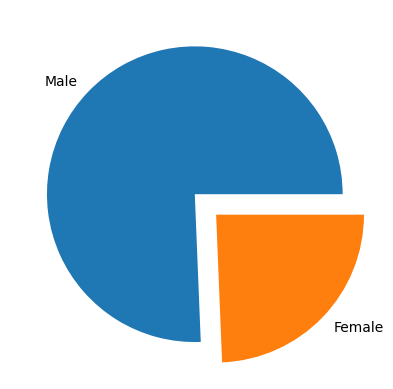

In [ ]:
x=liver_df["Gender"].value_counts()['Male']
y=liver_df["Gender"].value_counts()['Female']
sex_labels=["Male","Female"]
explode=[0,0.2]
plt.pie([x,y],labels=sex_labels,explode=explode)

plt.show()

<Axes: xlabel='Dataset', ylabel='count'>

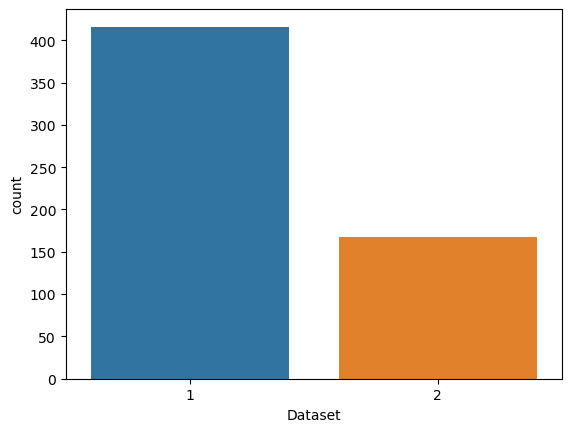

In [ ]:
#we plot a count plot of people having liver disease and people do not having liver disease
sns.countplot(data=liver_df,x='Dataset',label='count')

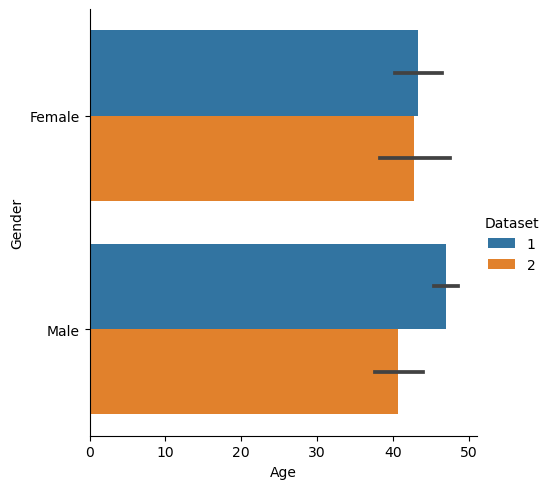

In [ ]:
#we plot it by gender and age
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df,kind="bar" )

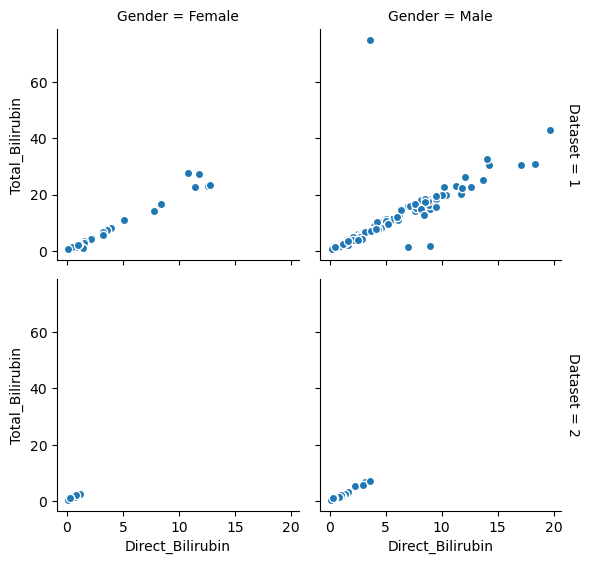

In [ ]:
#we can see that as people get older the chances of getting a liver disease increases
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

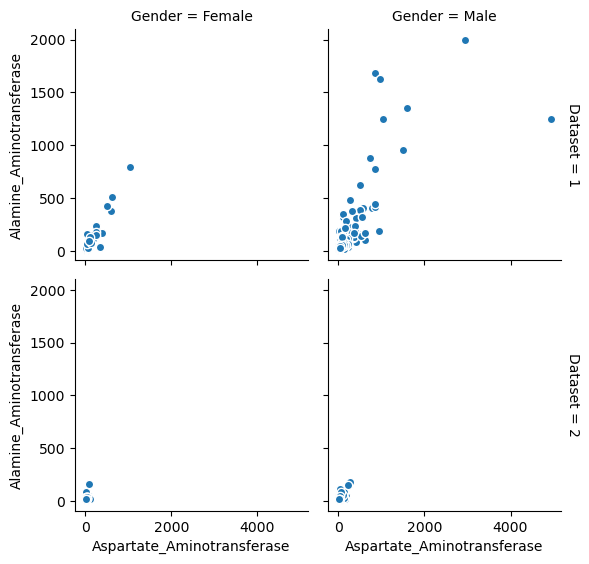

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

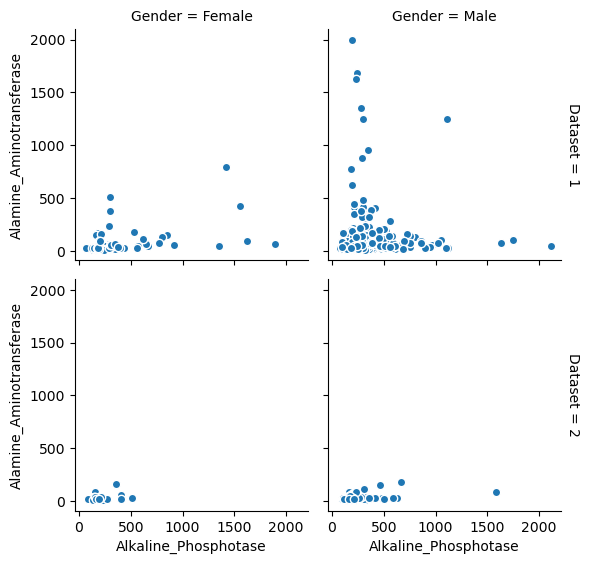

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

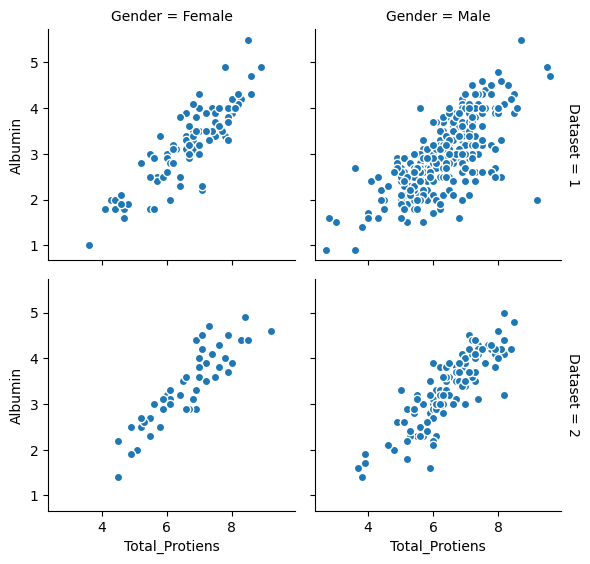

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

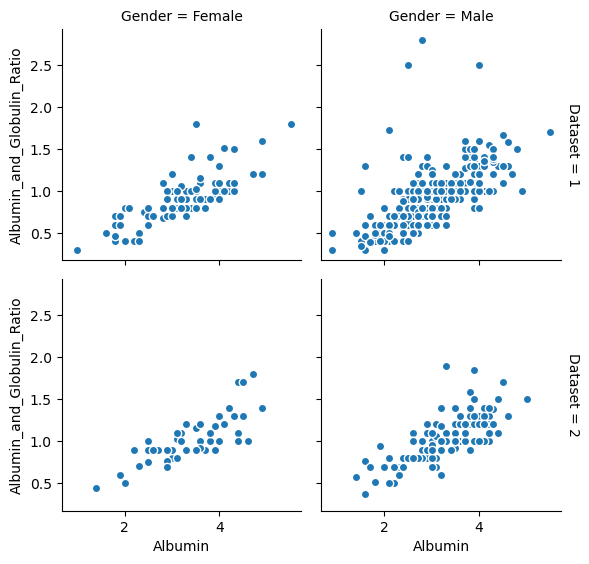

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

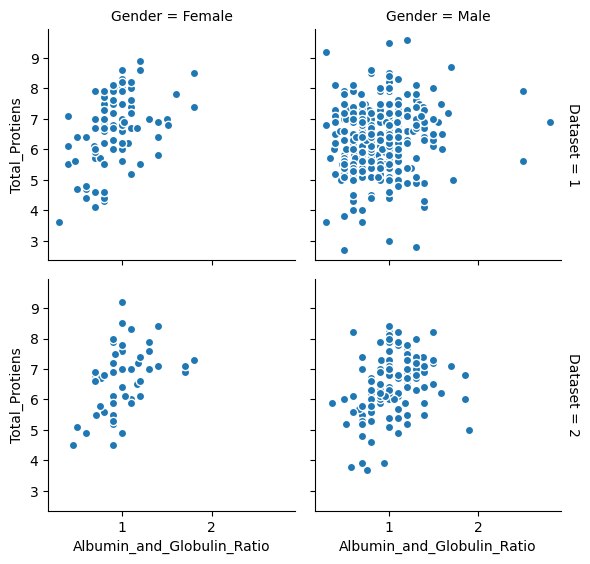

In [ ]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [ ]:
#we write a summary about the observations we get from this


In [ ]:
#we find the correation between the attributes and visualize it on the heatap


In [ ]:
X=liver_df.drop(['Gender','Dataset'],axis=1)


In [ ]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
liver_corr=X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


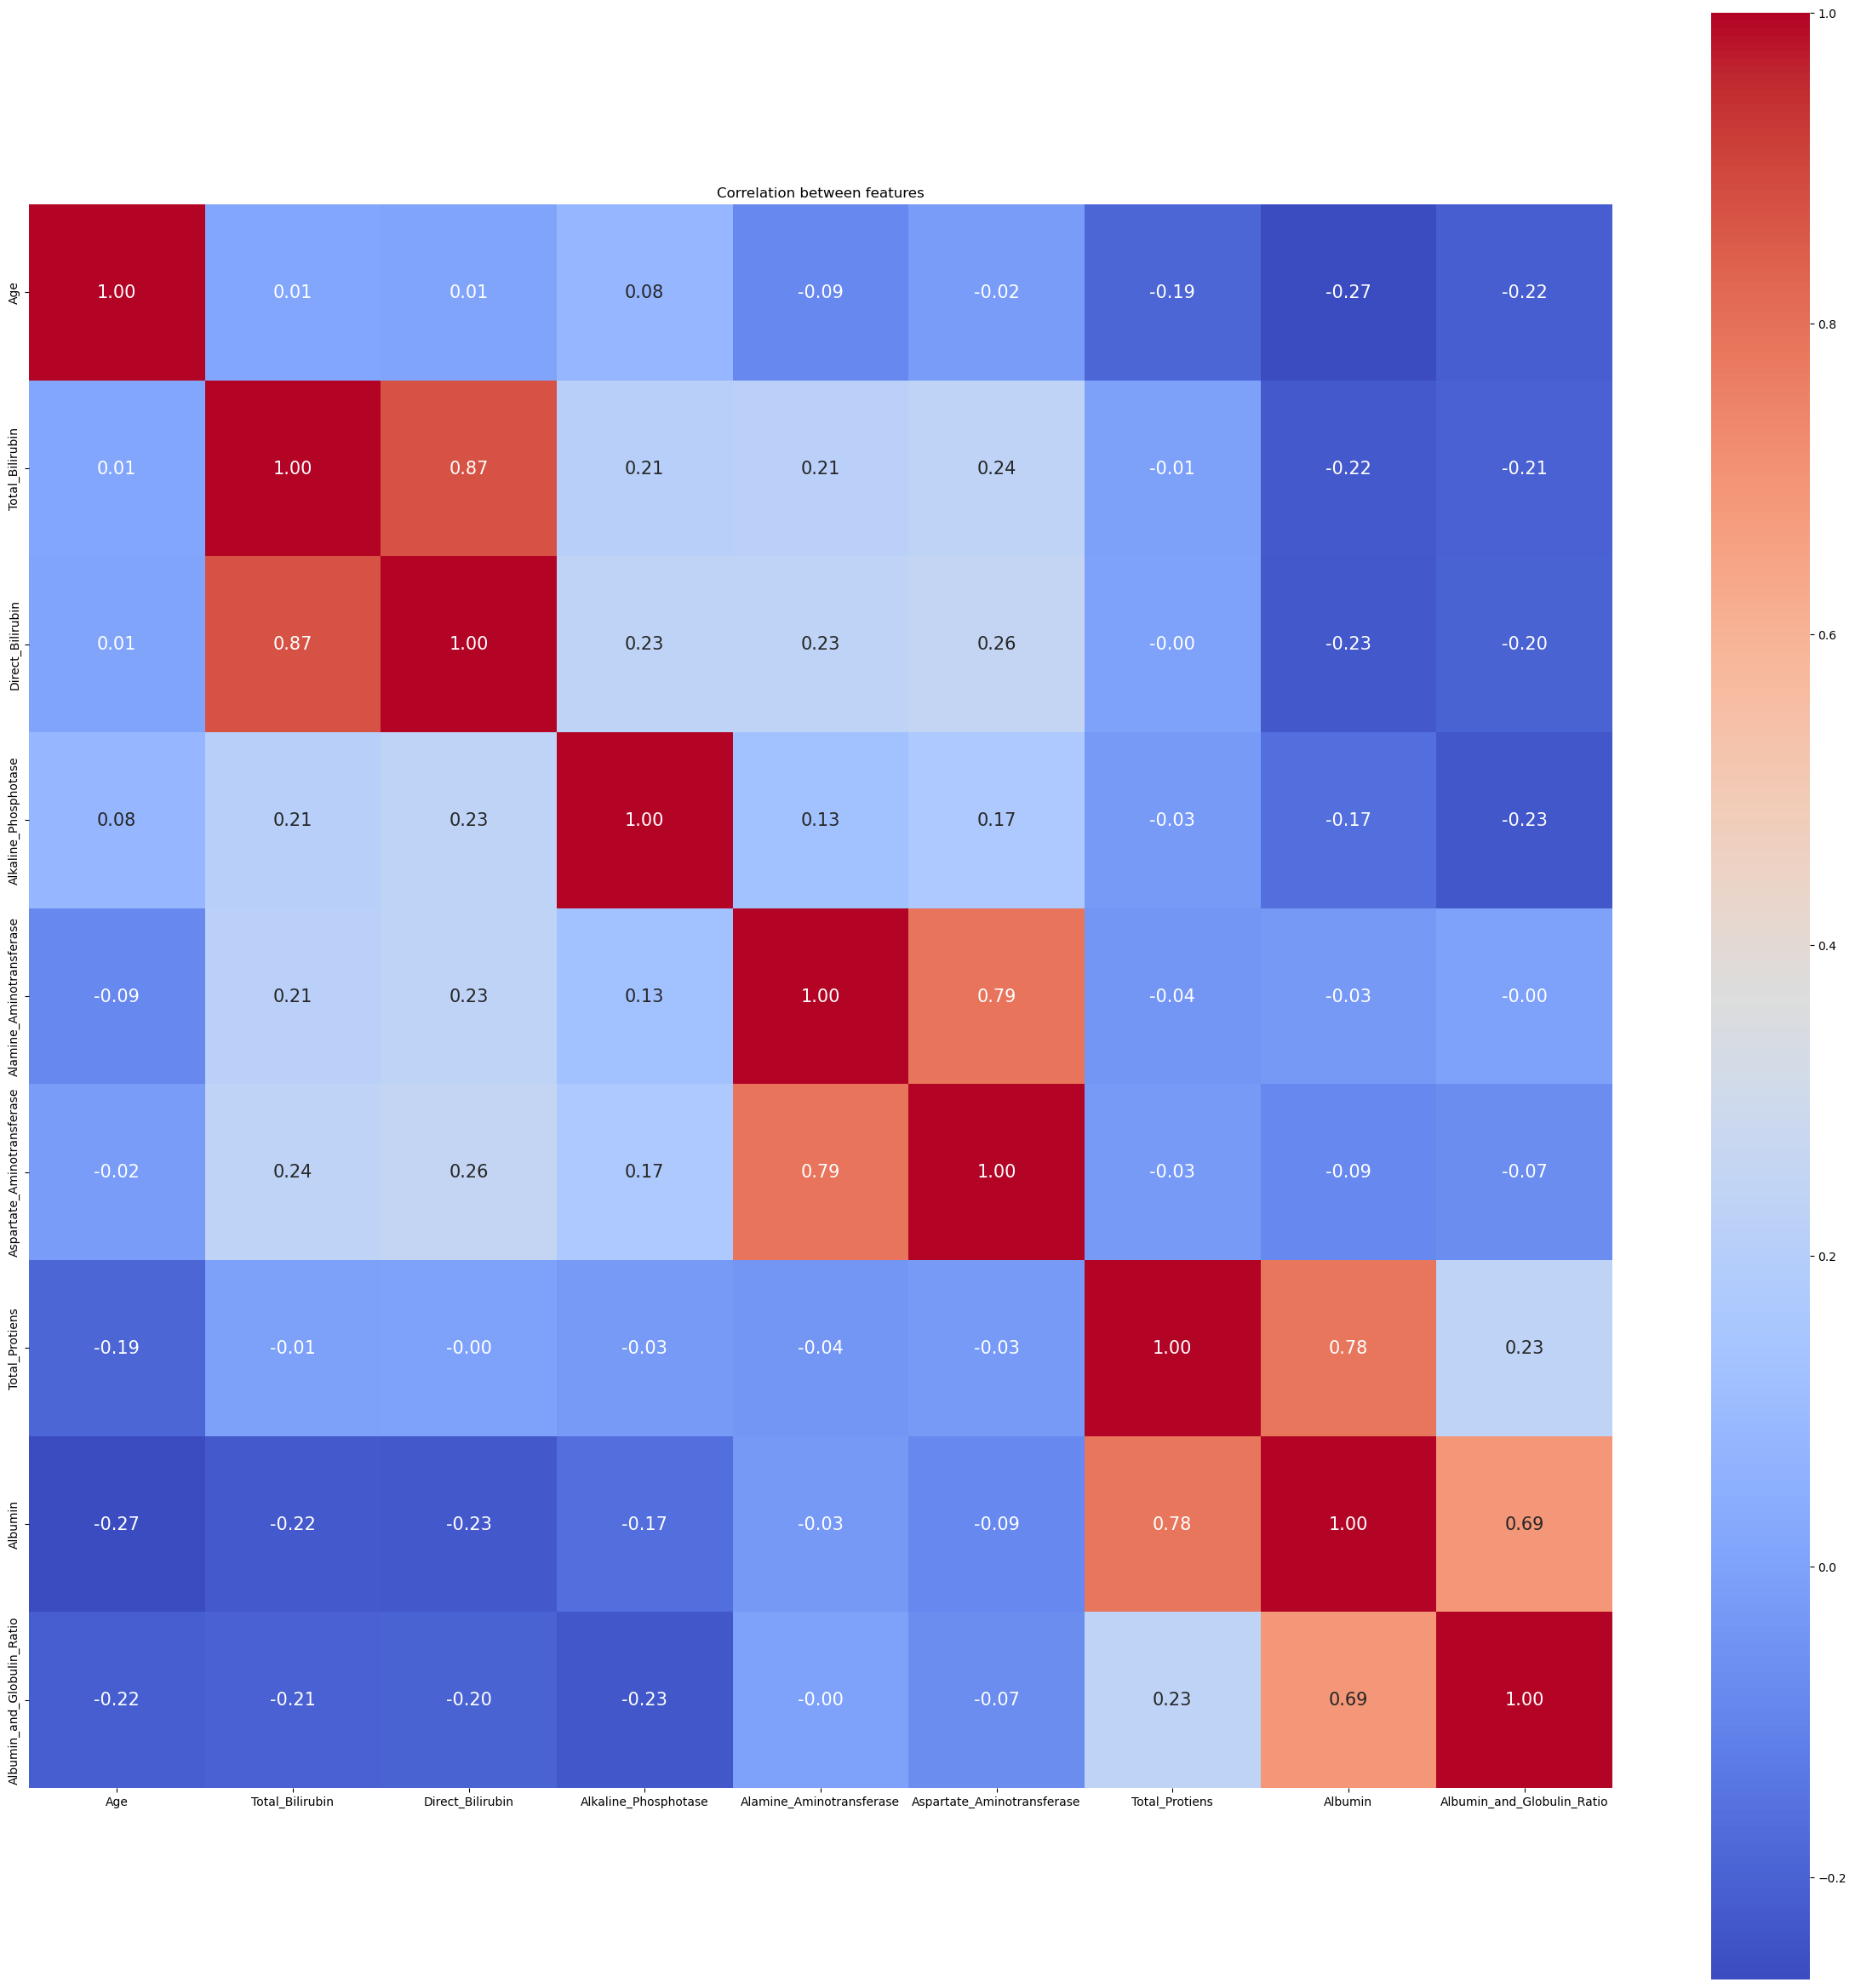

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [ ]:
#after getting a general idea about the attributes and finding the correaltion between different attributes
#it is time for us to pre process the data and clean it


In [ ]:
#we begin with checking wether there are any null values in the dataset


In [ ]:
liver_df.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
#finding that there are four null values in our dataset
#we have to either remove them or update them with appropriate value


In [ ]:
liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)


In [ ]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
#now there are no null values in the dataset


In [ ]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
X=liver_df.drop(['Dataset','Gender'],axis=1)

In [ ]:
print(X)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

In [ ]:
Y=liver_df.Dataset

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
len(X_train)

466

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
score = regressor.score(X_test, Y_test)
print(score)

0.1250872385460825


In [ ]:
from sklearn import linear_model

In [ ]:
clf = linear_model.Lasso(alpha=0.1)

In [ ]:
clf.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [ ]:
clf.predict(X_test)

array([1.39063212, 1.0618062 , 1.30818249, 1.25443417, 1.32602906,
       1.26700625, 1.27866784, 1.29270582, 1.42367969, 1.03550927,
       1.27671034, 1.38416453, 1.43775204, 1.29763968, 1.33664605,
       1.27069129, 1.3802807 , 1.33792522, 1.25701022, 1.26352359,
       1.36875957, 1.29038064, 1.17445268, 1.35309224, 1.32647788,
       1.09455239, 1.36642696, 1.43890755, 1.37673329, 1.27792404,
       1.34484992, 1.23477559, 1.40938557, 1.34910983, 1.07512254,
       1.39301119, 1.33279899, 1.33590131, 1.40660562, 1.32195284,
       1.25784123, 1.31182589, 1.36440406, 1.19445091, 1.2614277 ,
       1.34237446, 1.25866335, 1.3801438 , 1.31062888, 1.27025153,
       1.3892612 , 1.40470854, 1.39763946, 1.35855441, 1.35686266,
       1.1366461 , 1.3128703 , 1.35332703, 0.92460132, 1.2866687 ,
       1.31984432, 1.05003171, 1.36708994, 1.33324749, 1.21699738,
       1.3655658 , 1.20239062, 1.24341729, 1.35181258, 1.37413656,
       1.30594454, 1.27457193, 1.36010433, 1.33061879, 1.34458

In [ ]:
clf.score(X_test,Y_test)

0.10298411048114031

In [ ]:
#linear model fail here



In [ ]:
#label_encoder to determine the sex


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
liver_df['Gender']=encoder.fit_transform(liver_df['Gender'])


In [ ]:
liver_df.drop(['Sex'],axis=1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
#applying SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(kernel='linear')

In [ ]:
X=liver_df.drop(['Dataset'],axis=1)
print(X)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [ ]:
Y=liver_df.Dataset

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
svm.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
svm.score(X_test,Y_test)

0.7264957264957265

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [ ]:
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

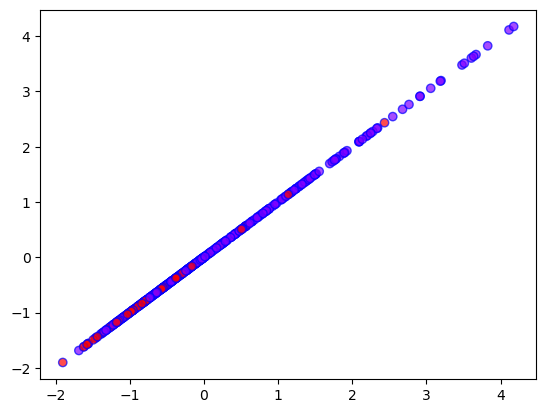

In [ ]:
plt.scatter(
    X_train,X_train,c=Y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [ ]:
classifier.score(X_test,Y_test)

0.7264957264957265

SVC(gamma='auto')